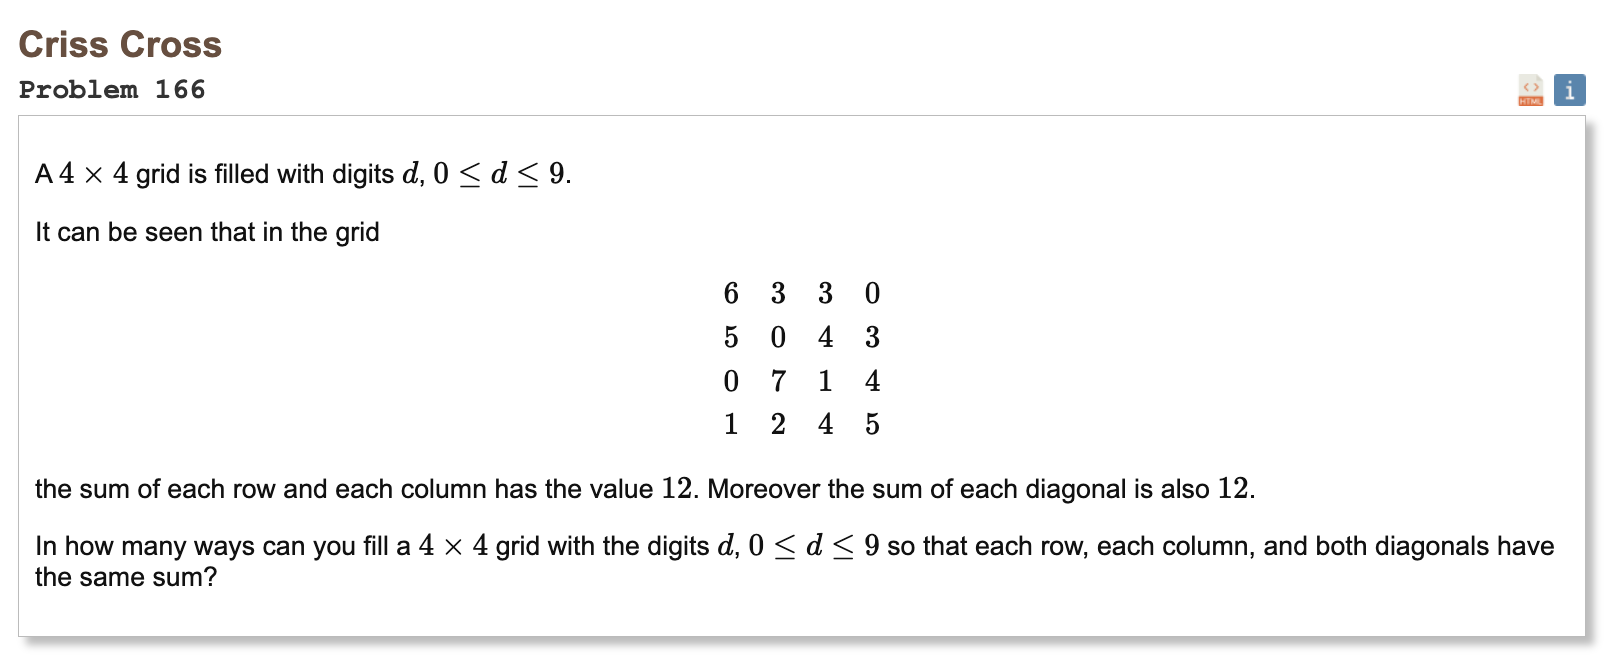

## Initial approach

* fill a 4x4 grid with digits 0–9
* all rows, columns, and both diagonals must have same sum s
* precompute all 4-digit rows summing to s
* reuse rows with memoization and only keep numeric constraints
* avoid recomputing sums and diagonal checks repeatedly
* loop over valid s values 0–36 and accumulate total count

```python
%%time

from itertools import product

def solve():
    total = 0
    digits = range(10)
    cache = {s: [r for r in product(digits, repeat=4) if sum(r) == s] for s in range(37)}
    for s, rows in cache.items():
        for r1 in rows:
            for r2 in rows:
                for r3 in rows:
                    r4 = [s - r1[i] - r2[i] - r3[i] for i in range(4)]
                    if any(x < 0 or x > 9 for x in r4):
                        continue
                    if r1[0] + r2[1] + r3[2] + r4[3] != s:
                        continue
                    if r1[3] + r2[2] + r3[1] + r4[0] != s:
                        continue
                    total += 1
    return total

print("Result:", solve())
```

* it takes too long
* needs optimization